In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from skimage.io import imread , imshow
from skimage import color
from skimage import measure
import math

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    ORIG = None
    WCSS = None
    
    def __init__(self, image, clusters):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        self.ORIG = img.copy()
        
        #convert to rgb from bgr
        #img = color.rgb2hsv(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
            
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS, init = 'k-means++', random_state = 0)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS
    
    def show(self):
        cv2.imshow('img',self.ORIG)
        
    def elbow(self):
        #Elbow method
        wcss = []
        for i in range(1, 10):
            kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
            kmeans.fit(self.IMAGE)
            wcss.append(kmeans.inertia_)
        self.WCSS = wcss
        plt.plot(range(1, 10), wcss)
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()

[[ 27.30624021  97.09587008 252.97378617]
 [144.87209302 230.1431686   93.51090116]
 [140.         109.43731778 115.67346939]
 [ 26.50545455  72.48181818 170.04909091]]


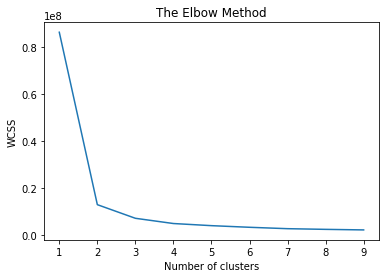

In [16]:
img = 'segmentation_WBC-master/Dataset 1/001.bmp'
clusters = 4
dc = DominantColors(img, clusters) 

#cv2.imshow('image',img)
colors = dc.dominantColors()
#cv2.imshow('Test',dc.mark_label(212,181,213))

print(colors)
dc.elbow()

##            y         -          y1        = m ( x - x1 )
dc.WCSS[0] - dc.WCSS[8] = m ( 1 - 9)

In [17]:
m = (dc.WCSS[0]-dc.WCSS[8])/(1-9)
print(m)
dc.WCSS[0]

-10555811.044158945


86495523.27513888

## y=mx+c
c = y-mx
( x , y )

( 1 , WCSS[0] )

In [18]:
c = dc.WCSS[0]-m*1
print(c)
print((m+dc.WCSS[0]+c)/math.sqrt(m**2+1))

97051334.31929784
16.388228798961077


y=mx+c

mx-y+c=0

Ax+By+C=0

P(x1,y1)

d = |A*x1+B*y1+C|/sqrt(A^2+B^2)

In [32]:
A=m
B=-1
maxD = 0
K = 0
for x1,y1 in enumerate(dc.WCSS,1):
    d = abs(A*x1+B*y1+c)/math.sqrt(A**2+B**2)
    if d > maxD:
        maxD = d
        K=x1
print(K)

2


In [33]:
from kneed import DataGenerator, KneeLocator
a = KneeLocator(np.arange(1,10), dc.WCSS, direction='decreasing')

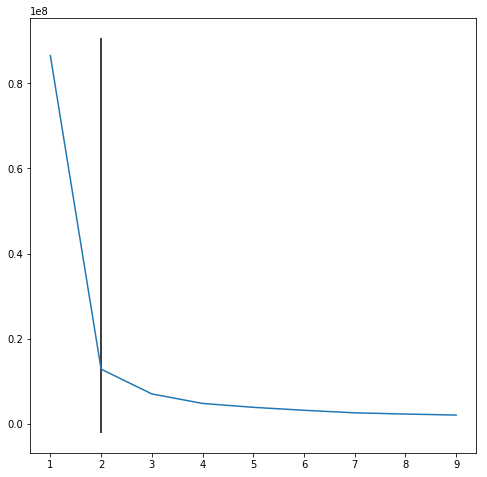

In [34]:
a.plot_knee()

In [35]:
a.find_knee()

(2, 0.125, 3)

In [36]:
secondDerivative = np.zeros(10)
for i in range(1,9):
    A = dc.WCSS[i+1] if i+1 < 9 else 0
    B = dc.WCSS[i-1] if i-1 > 0 else 0
    secondDerivative[i] = A + B - 2 * dc.WCSS[i]

In [37]:
secondDerivative

array([        0.        , -18663930.30991414,   3589636.58192461,
         1324600.4696952 ,    213321.80129439,    100667.6528653 ,
          307140.38994818,     51915.04874655,  -1811666.46378071,
               0.        ])

In [38]:
max(secondDerivative)

3589636.5819246117